In [1]:
!pip freeze

absl-py==1.4.0
accelerate==0.32.1
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albucore==0.0.12
albumentations==1.4.11
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.18.0
asn1crypto==1.5.1
astropy==6.1.2
astropy-iers-data==0.2024.7.22.0.34.13
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.15.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.11.1
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.4.2
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.4.0
catalogue==2.0.10
certifi==2024.7.4
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
clarabel==0.9.0
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.18.1
cloudpickle==2.2.1
cmake==3.30.1
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6


In [2]:
#Імпрот необхідних бібліотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
#Підключення до гугл-диска
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
#Зчитування даних
df = pd.read_csv('/content/drive/MyDrive/internet_service_churn.csv')

In [5]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [6]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [26]:
#Видалення колонки id
df=df.drop(columns=['id'])

In [27]:
#Видаляємо колонку 'reamining_contract' , оскільки вона містить інформацію про майбутнє, а це не потрібно нам для роботи нашої моделі передбачення відтоку клієнтів
df=df.drop(columns=['reamining_contract'])

In [28]:
#Видалення дублікатів
df.drop_duplicates(inplace=True)

In [29]:
df.describe()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,69299.000000,69299.000000,69299.000000,69299.000000,69299.000000,69178.000000,69178.000000,69299.000000,69299.000000
mean,0.829781,0.342891,2.504924,19.306931,0.284968,45.403753,4.356541,0.206886,0.538767
std,0.375828,0.474679,2.046687,13.213966,0.831364,64.033641,9.973878,0.994653,0.498498
min,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.960000,13.000000,0.000000,8.800000,0.700000,0.000000,0.000000
50%,1.000000,0.000000,1.990000,19.000000,0.000000,29.700000,2.200000,0.000000,1.000000
75%,1.000000,1.000000,3.400000,23.000000,0.000000,62.300000,5.000000,0.000000,1.000000
max,1.000000,1.000000,12.800000,406.000000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [30]:
# Виявлення відсутніх значень
missing_values = df.isnull().sum()
print(missing_values)

is_tv_subscriber                 0
is_movie_package_subscriber      0
subscription_age                 0
bill_avg                         0
service_failure_count            0
download_avg                   121
upload_avg                     121
download_over_limit              0
churn                            0
dtype: int64


In [31]:
#Замінимо відсутні значення у стовпчиках завантаження та вивантаження на середнє значення
df['download_avg'].fillna(df['download_avg'].mean(), inplace=True)
df['upload_avg'].fillna(df['upload_avg'].mean(), inplace=True)

In [32]:
# Виявлення відсутніх значень після редагування
missing_values = df.isnull().sum()
print(missing_values)

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64


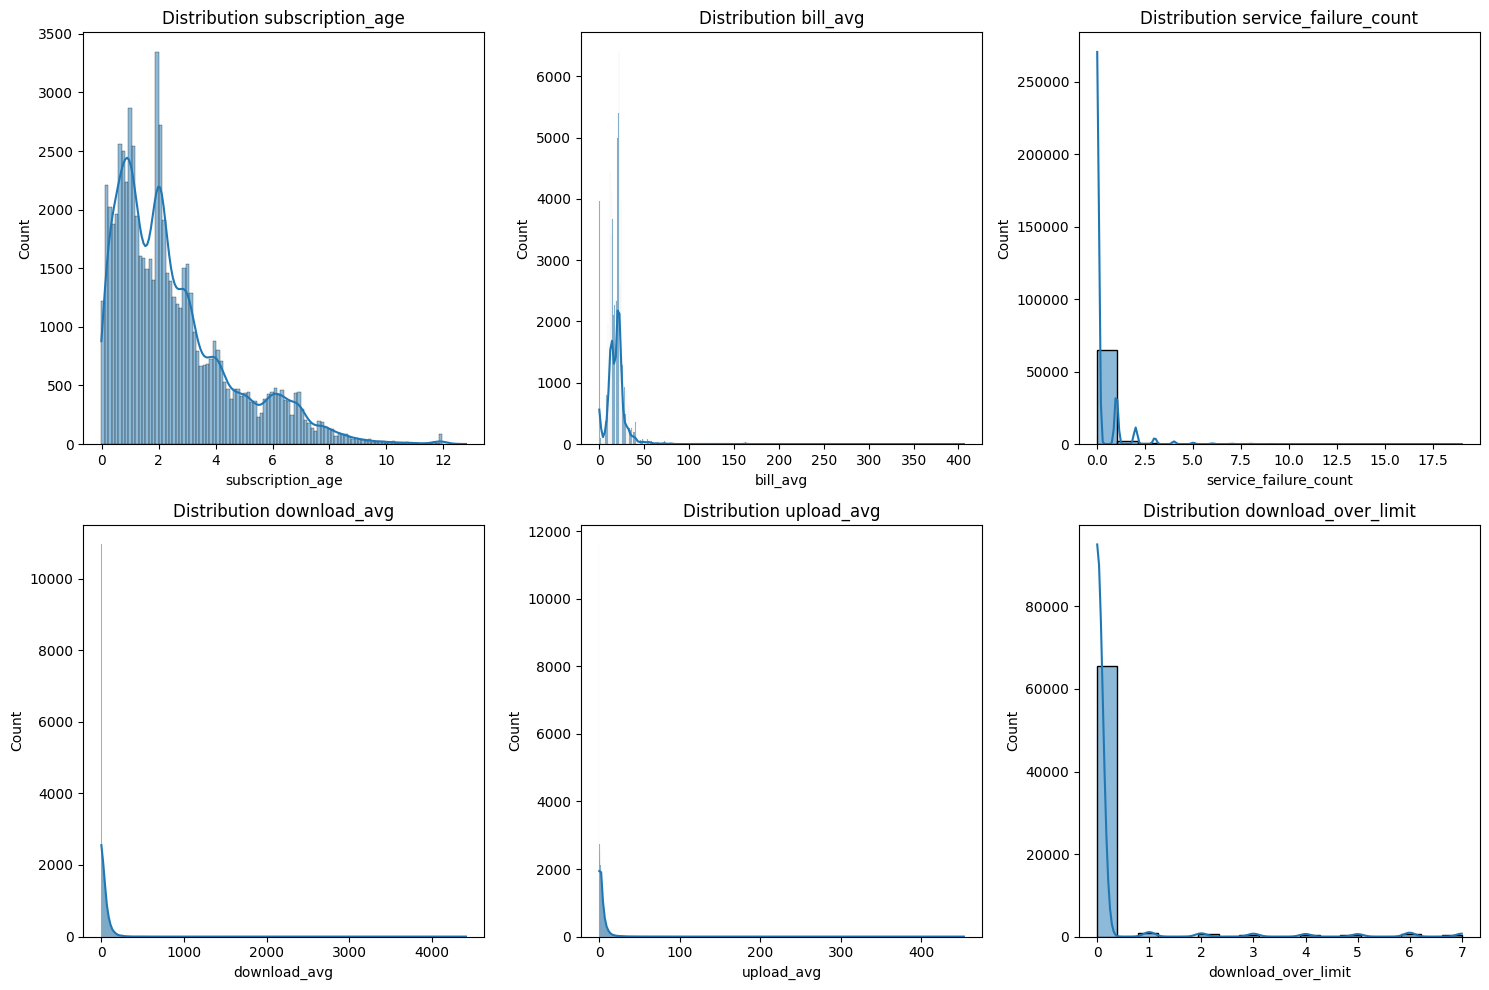

In [34]:
# Вивчення розподілів числових змінних
numeric_cols = ['subscription_age', 'bill_avg', 'service_failure_count','download_avg', 'upload_avg','download_over_limit']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution {col}')
plt.tight_layout()
plt.show()

In [35]:
# Обчислення матриці кореляцій
correlation_matrix = df.corr()

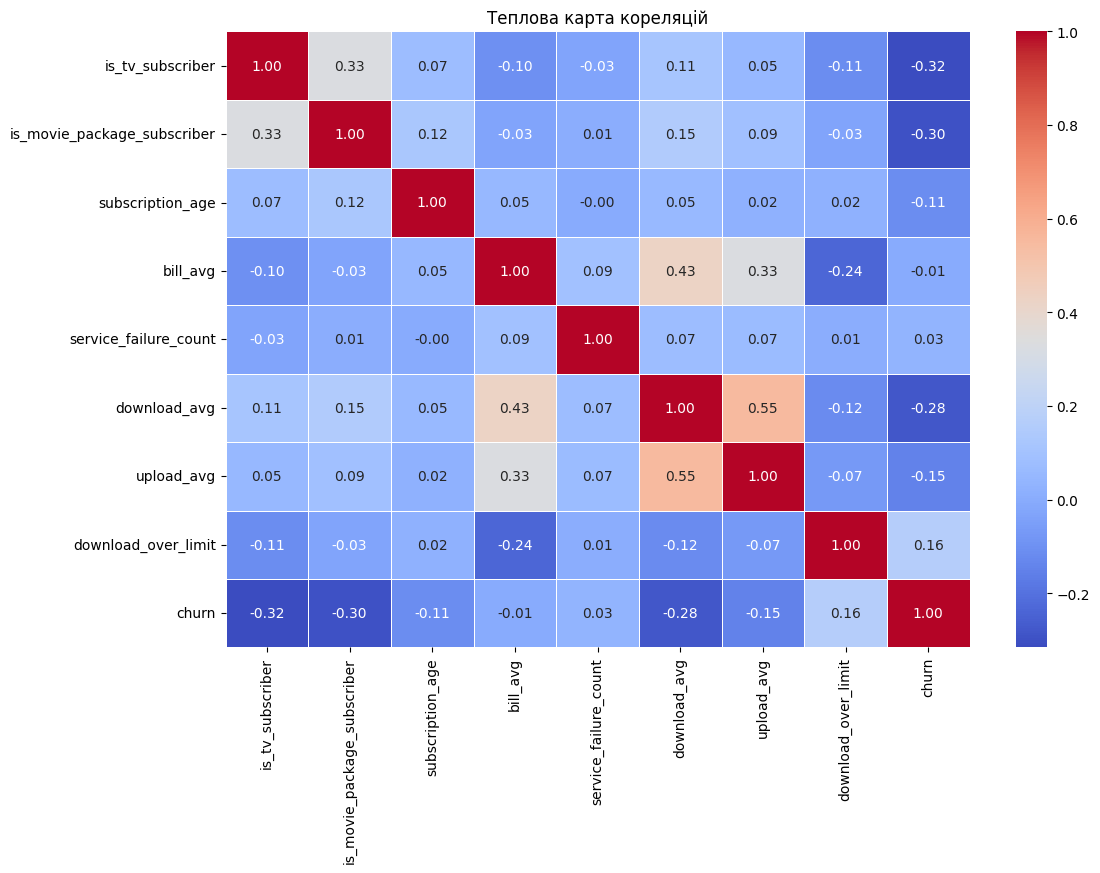

In [36]:
# Візуалізація теплової карти кореляцій
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Теплова карта кореляцій')
plt.show()

Метод IQR (Interquartile Range) використовується для виявлення та видалення викидів (аномалій) з даних. Він базується на статистичному понятті міжквартильного розмаху, який обчислюється як різниця між верхнім квартилем (Q3) та нижнім квартилем (Q1) розподілу даних. Викиди зазвичай визначаються як ті дані, які знаходяться за межами [Q1 - 1.5IQR, Q3 + 1.5IQR].

In [37]:
# Виявлення аномалій за допомогою IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


MinMaxScaler — це один із найпоширеніших методів нормалізації даних, який є частиною бібліотеки scikit-learn. Цей метод масштабування даних використовується для перетворення значень числових змінних у заданий діапазон, зазвичай від 0 до 1. Це корисно для алгоритмів машинного навчання, які чутливі до масштабів даних.

In [38]:
# Ініціалізація нормалізатора
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,download_avg,upload_avg,download_over_limit,churn
4,0,0,0.905367,0.000000,0.0,0.0,0.0,0.0,1
12,0,0,0.940678,0.263158,0.0,0.0,0.0,0.0,1
13,0,0,0.783898,0.368421,0.0,0.0,0.0,0.0,1
14,0,0,0.987288,0.605263,0.0,0.0,0.0,0.0,1
18,0,0,0.964689,0.368421,0.0,0.0,0.0,0.0,1


In [39]:
# Обчислення матриці кореляцій
correlation_matrix = df.corr()

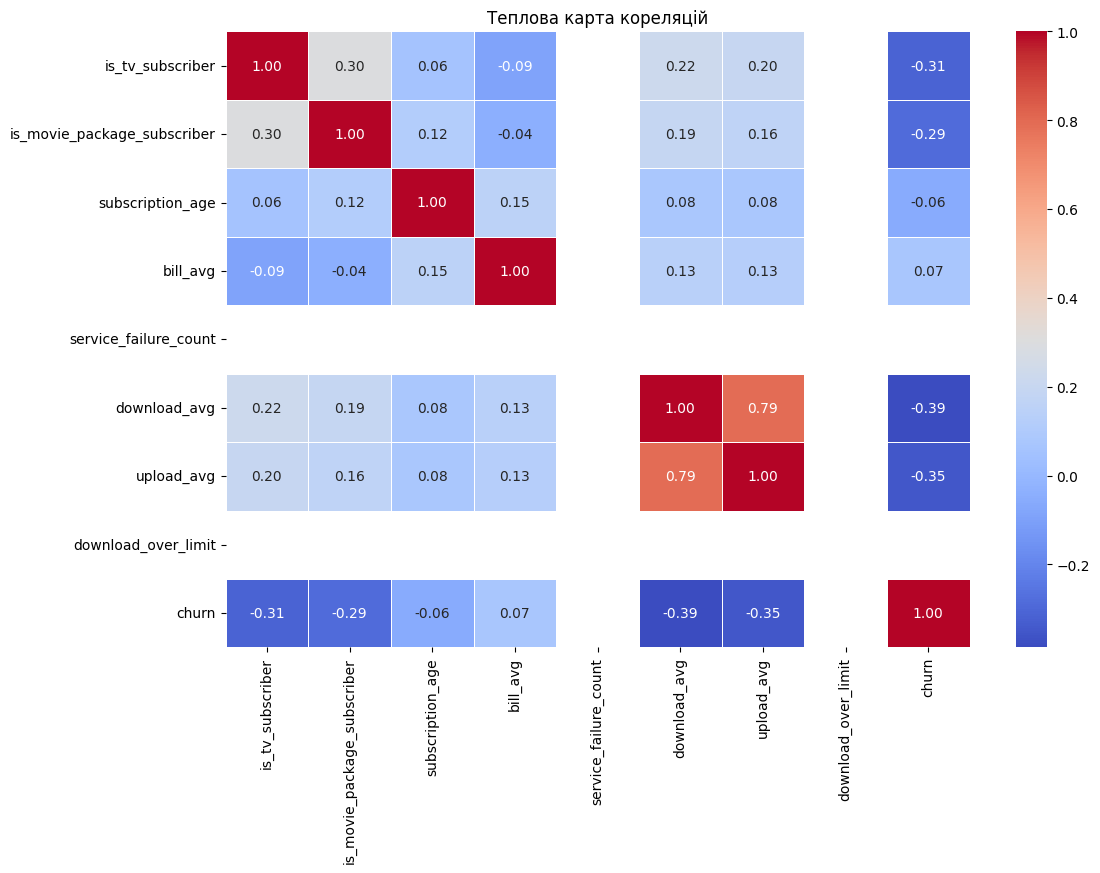

In [40]:
# Візуалізація теплової карти кореляцій
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Теплова карта кореляцій')
plt.show()

In [41]:
#Оскільки видно що на тепловій карті кореляцій відсутні дані по стовпчику service_failure_count та download_over_limit, таке можливо у нашому випадку після проведення викиду аномалій так як там майже всі дані 0 а ті що ні відкидаються, тому думаю цей стовпчик можна прибрати
df=df.drop(columns=['service_failure_count'])
df=df.drop(columns=['download_over_limit'])

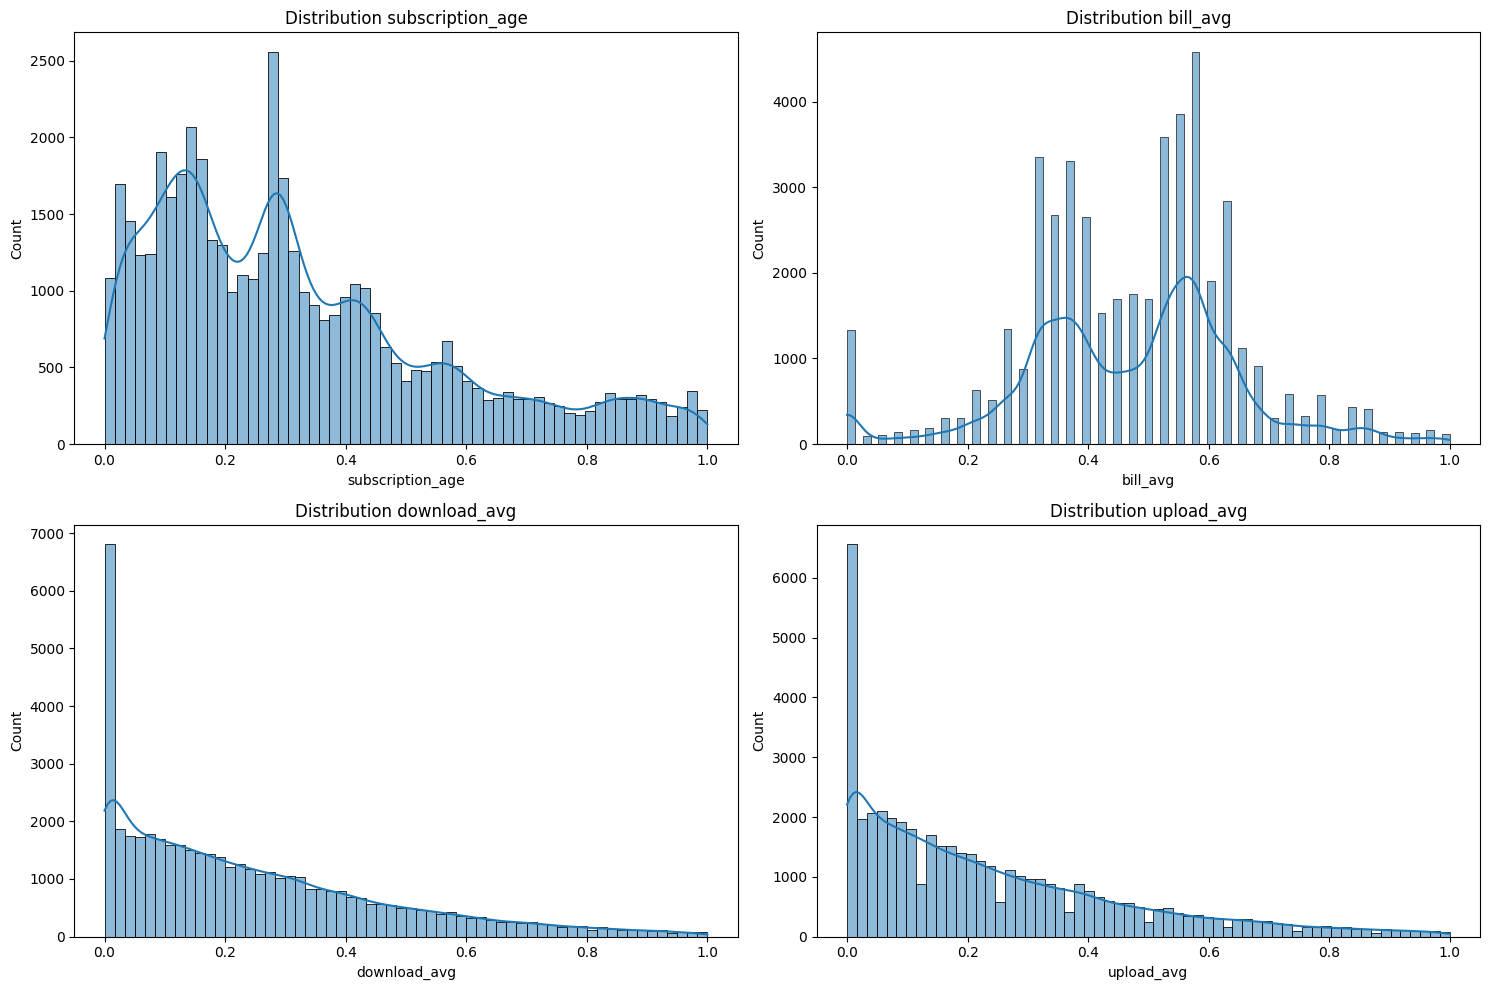

In [46]:
# Вивчення розподілів числових змінних після обробки
numeric_cols = ['subscription_age', 'bill_avg','download_avg', 'upload_avg']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution {col}')
plt.tight_layout()
plt.show()

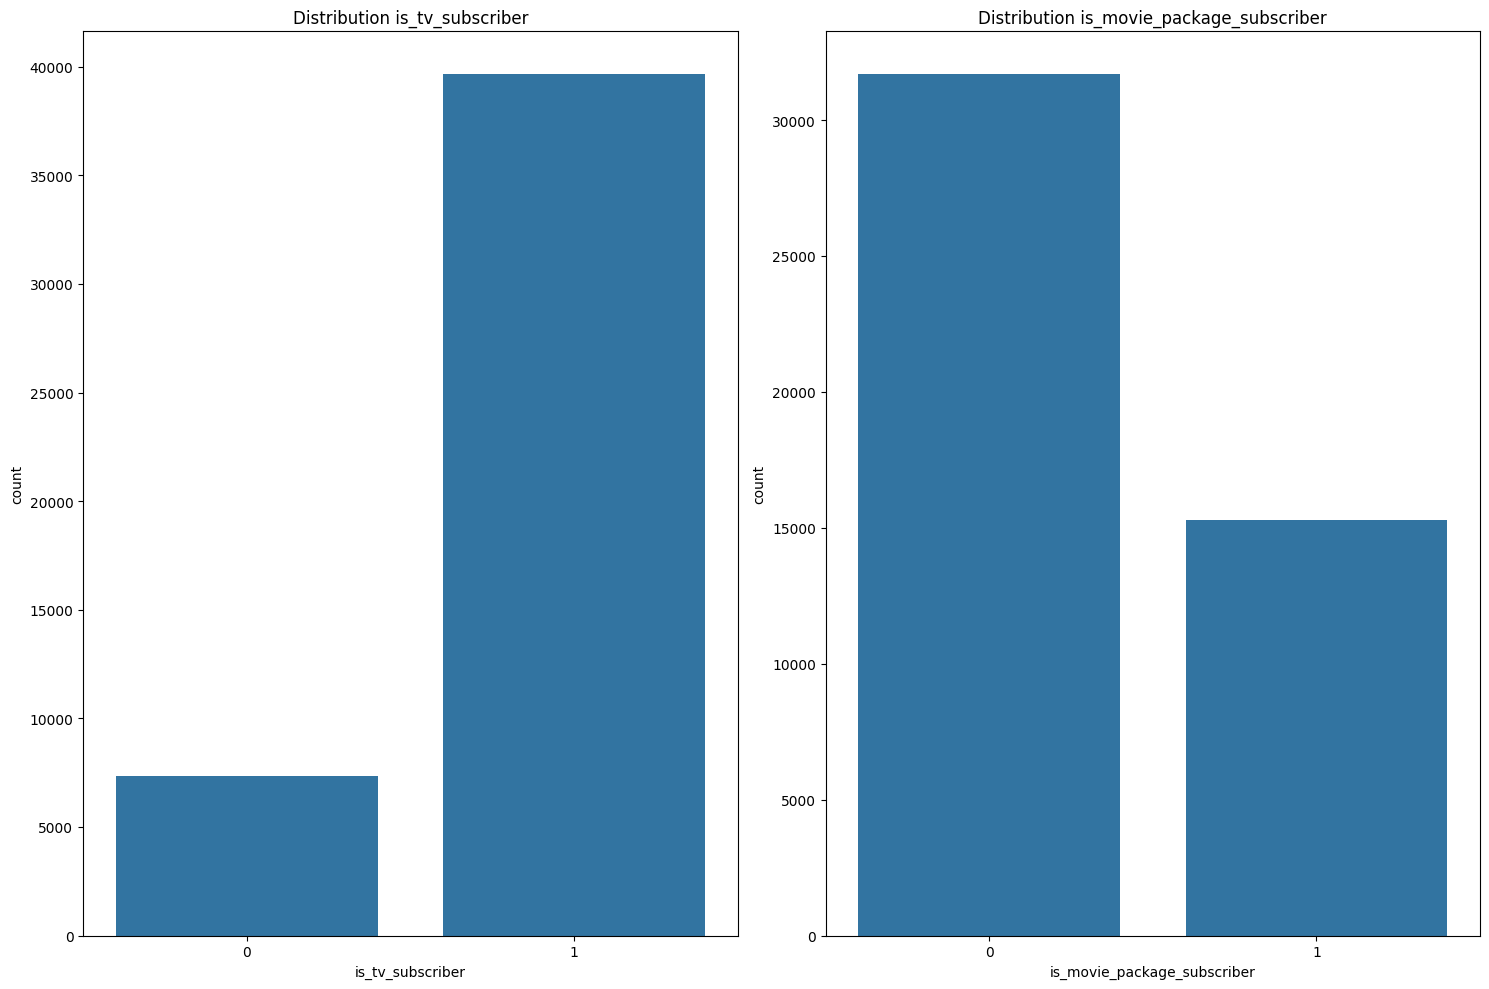

In [47]:
# Вивчення розподілів бінарних змінних
binary_cols = ['is_tv_subscriber', 'is_movie_package_subscriber']

plt.figure(figsize=(15, 10))
for i, col in enumerate(binary_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution {col}')
plt.tight_layout()
plt.show()

In [48]:
# Збереження DataFrame у файл CSV
df.to_csv('data4.csv', index=False)